In [1]:
import os 
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from pyogrio import read_dataframe
import time
import glob 
import plotly.graph_objects as go
import pandas as pd
import warnings
from math import sin, cos, asin, sqrt
import matplotlib.pylab as plt
import seaborn as sns
from scipy import stats
from pandas.api.types import is_object_dtype


# Read IRS county-county migration data at https://www.irs.gov/statistics/soi-tax-stats-migration-data

In [19]:
'''
Number of returns filed, which approximates the number of households that migrated 
Number of personal exemptions claimed, which approximates the number of individuals 
Total adjusted gross income, starting with Filing Year 1995 Aggregate migration flows at the State level, by the size of adjusted gross income (AGI) and age of the primary taxpayer, starting with Filing Year 2011.


inflows—the number of new residents who moved to a State or county and where they migrated from, 
outflows—the number of residents leaving a State or county and where they went. 

'''

'\nNumber of returns filed, which approximates the number of households that migrated \n\nNumber of personal exemptions claimed, which approximates the number of individuals \n\nTotal adjusted gross income, starting with Filing Year 1995 Aggregate migration flows at the State level, by the size of adjusted gross income (AGI) and age of the primary taxpayer, starting with Filing Year 2011.\n'

In [29]:

df_inflow  = pd.read_excel('/Users/yuhan/Desktop/Gradient_Boost_code/inputs/migration_data/Texas_county_flows/1819tx.xls', 
                   sheet_name = 'County Inflow',
                   skiprows= 6)
df_inflow.columns = ['OStateCode', 'OCountyCode', 'DStateCode', 'DCountyCode', 
                     'DState', 'DCountyName', 'NofReturn', 'NofExemptions', 'AGI' ]
df_inflow_tx = df_inflow.loc[ ( df_inflow['DStateCode']  == 48 )&
                              ( df_inflow['DCountyCode'] == 167 )  ].reset_index()

print( df_inflow_tx.shape )
print( df_inflow_tx.head() )

df_inflow_tx.groupby()


(28, 10)
   index OStateCode  OCountyCode  DStateCode  DCountyCode DState  \
0     51         48          5.0        48.0        167.0     TX   
1    290         48         27.0        48.0        167.0     TX   
2    404         48         29.0        48.0        167.0     TX   
3    735         48         39.0        48.0        167.0     TX   
4    802         48         41.0        48.0        167.0     TX   

        DCountyName NofReturn NofExemptions    AGI  
0  Galveston County        22            36   1484  
1  Galveston County        33            64   1575  
2  Galveston County       118           223   8328  
3  Galveston County       720          1442  49464  
4  Galveston County        51            76   3519  


In [30]:

df_outflow = pd.read_excel('/Users/yuhan/Desktop/Gradient_Boost_code/inputs/migration_data/Texas_county_flows/1819tx.xls', 
                   sheet_name = 'County Outflow',
                   skiprows= 6)
df_outflow.columns = ['OStateCode', 'OCountyCode', 
                     'DStateCode', 'DCountyCode', 
                     'DState', 'DCountyName', 
                     'NofReturn', 'NofExemptions', 'AGI' ]
df_outflow_tx = df_outflow.loc[ ( df_outflow['OStateCode']  == 48 )&
               ( df_outflow['OCountyCode']  == 167 )  ].reset_index()

print( df_outflow_tx.shape )
print( df_outflow_tx.head() )


(48, 10)
   index OStateCode  OCountyCode  DStateCode  DCountyCode DState  \
0   2510         48        167.0        96.0          0.0     TX   
1   2511         48        167.0        97.0          0.0     TX   
2   2512         48        167.0        97.0          1.0     TX   
3   2513         48        167.0        97.0          3.0     TX   
4   2514         48        167.0        98.0          0.0     TX   

                                        DCountyName NofReturn NofExemptions  \
0   Galveston County Total Migration-US and Foreign      8758         16380   
1               Galveston County Total Migration-US      8733         16340   
2       Galveston County Total Migration-Same State      6628         12365   
3  Galveston County Total Migration-Different State      2105          3975   
4          Galveston County Total Migration-Foreign        25            40   

      AGI  
0  584139  
1  583879  
2  429859  
3  154020  
4     259  


In [ ]:
pth_root = "/Users/yuhan/Desktop/Gradient_Boost_code/data/migration_data/Texas"
path = os.getcwd() 
csv_files = glob.glob(os.path.join(pth_root, "*.xls")) 

df_daily = []
# loop over the list of csv files 
for f_pth in csv_files: 
    # read the csv file 
    travel_daily_df  = pd.read_excel( f_pth , 
                   sheet_name = 'County Inflow', skiprows= 6)
    
    
    travel_daily_dfi = travel_daily_df.loc[ ( travel_daily_df['lng_o'] < -94.15  ) & 
                                            ( travel_daily_df['lng_o'] > -96.475 ) &
                                            ( travel_daily_df['lat_o'] < 30.658  ) & 
                                            ( travel_daily_df['lat_o'] > 28.814  ) &
                                            ( travel_daily_df['lng_d'] < -94.15  ) & 
                                            ( travel_daily_df['lng_d'] > -96.475 ) &
                                            ( travel_daily_df['lat_d'] < 30.658  ) & 
                                            ( travel_daily_df['lat_d'] > 28.814  )  ].reset_index()
    df_daily.append( travel_daily_dfi )
    # print the location and filename 
    #print( 'Location:', f) 
    #print( 'File Name:', f.split("\\")[-1]) 
    # print the content 
    #print( 'Content:' ) 
    #display( travel_daily_dfi.shape[0] ) 
    #print() 
travel_daily = pd.concat( df_daily )
print( "travel_daily shape ", travel_daily.shape ) 

# Read IRS county-county migration data at Galveston

In [ ]:
#Outflow: Destination (y2) has 4 columns
#Inflow: Origin (y1) has 4 columns

In [ ]:

print( df_inflow_tx.shape )
print( df_inflow_tx.head() )

df_inflow_tx.groupby()

In [2]:
df_outflow  = pd.read_csv( '/Users/yuhan/Desktop/Gradient_Boost_code/data/migration_data/Galveston_US_flows/outflow/countyoutflow1112.csv', encoding = "ISO-8859-1" )
print( df_outflow.head() )
df_outflow.columns  = ['y1_statefips', 'y1_countyfips', 'y2_statefips', 'y2_countyfips', 
                        'y2_state', 'y2_countyname', 'n1', 'n2', 'n1' ]

print( df_outflow.shape )
df_outflow_galv          = df_outflow.loc[ ( df_outflow['y1_statefips']  == 48 )&
                              ( df_outflow['y1_countyfips'] == 167 )  ].reset_index()
print( df_outflow_galv.shape )

   y1_statefips  y1_countyfips  y2_statefips  y2_countyfips y2_state  \
0             1              0            96              0       AL   
1             1              0            97              0       AL   
2             1              0            97              1       AL   
3             1              0            97              3       AL   
4             1              0            98              0       AL   

                     y2_countyname      n1      n2      agi  
0   Total Migration-US and Foreign  115723  242428  4490820  
1               Total Migration-US  114692  240130  4441354  
2       Total Migration-Same State   63752  135124  2381712  
3  Total Migration-Different State   50940  105006  2059642  
4          Total Migration-Foreign    1031    2298    49465  
(130297, 9)
(104, 10)


In [3]:
df_inflow       = pd.read_csv( '/Users/yuhan/Desktop/Gradient_Boost_code/data/migration_data/Galveston_US_flows/outflow/countyoutflow1011.csv', 
                                   encoding = "ISO-8859-1" )
#print( df_inflow.head() )
df_inflow.columns   = ['y2_statefips', 'y2_countyfips', 'y1_statefips', 'y1_countyfips', 
                        'y1_state', 'y1_countyname', 'n1', 'n2', 'agi' ]


#print( df_inflow.loc[ ( df_inflow['']  == "48" ) ].head() )

print( df_inflow['y2_statefips'].dtype )

print( df_inflow['y2_statefips'].unique() )
#= df_inflow['y2_statefips'].apply(pd.to_numeric,1)

print( df_inflow.shape )
df_inflow_galv       = df_inflow.loc[ ( df_inflow['y2_statefips']  == 48 )&
                                            ( df_inflow['y2_countyfips'] == 167 ) &
                                            ( df_inflow['y1_countyname'].isin( 
                                                ['Galveston County Total Migration-US and Foreign',
                                                  'Galveston Count Tot Mig-US & For'] ) )  ].reset_index()
print( df_inflow_galv.shape )

int64
[48]
(8635, 9)
(1, 10)


In [4]:
root_pth_list = [ 
    "/Users/yuhan/Desktop/Gradient_Boost_code/data/migration_data/Galveston_US_flows/inflow",
    "/Users/yuhan/Desktop/Gradient_Boost_code/data/migration_data/Galveston_US_flows/outflow" ]


root_pth_names = ["inflow", "outflow"]

In [5]:
from pandas.api.types import is_object_dtype

for ri in range(len(root_pth_list)):
    root_pthi = root_pth_list[ri]
    rootnamei = root_pth_names[ri]
    csv_files = glob.glob(os.path.join(root_pthi, "*.csv")) 
    df_popflow = []
    # loop over the list of csv files 
    for f in csv_files: 
        # read the csv file 
        year_fi = int( f[-6:-4] )
        population_flow_df  = pd.read_csv(f, encoding = "ISO-8859-1") 
        if rootnamei == "inflow":
            population_flow_df.columns   = ['y2_statefips', 'y2_countyfips', 'y1_statefips', 
                                            'y1_countyfips', 'y1_state', 'y1_countyname', 
                                            'n1', 'n2', 'agi' ]
            if is_object_dtype( population_flow_df.n1 ) :
                population_flow_df['n1']     = population_flow_df['n1'].replace({',':''},regex=True).replace('d','', regex=True).apply(pd.to_numeric,1)
            if is_object_dtype( population_flow_df.n2 ) :
                population_flow_df['n2']     = population_flow_df['n2'].replace({',':''},regex=True).replace('d','', regex=True).apply(pd.to_numeric,1)
            if is_object_dtype( population_flow_df.agi ) :
                population_flow_df['agi']    = population_flow_df['agi'].replace({',':''},regex=True).replace('d','', regex=True).apply(pd.to_numeric,1)

            galveston_flow_df            = population_flow_df.loc[ 
                                            ( population_flow_df['y2_statefips']  == 48 )&
                                            ( population_flow_df['y2_countyfips'] == 167 ) &
                                            ( population_flow_df['y1_countyname'].isin( ['Galveston County Total Migration-US and Foreign',
                                                                                         'Galveston Count Tot Mig-US & For'
                                                                                          ] )  ) ].reset_index()
            #print( galveston_flow_df.shape )
            #print( galveston_flow_df.dtypes )
            
            galveston_flow_df["Year"]   = year_fi + 2000
            #df_popflow.append( galveston_flow_df )
        else :
            population_flow_df.columns   = ['y1_statefips', 'y1_countyfips',  'y2_statefips', 
                                           'y2_countyfips', 'y2_state', 'y2_countyname', 
                                           'n1', 'n2', 'agi' ]
            if is_object_dtype( population_flow_df.n1 ) :
                population_flow_df['n1']     = population_flow_df['n1'].replace({',':''},regex=True).replace('d','', regex=True).apply(pd.to_numeric,1)
            if  is_object_dtype( population_flow_df.n2 ) :
                population_flow_df['n2']     = population_flow_df['n2'].replace({',':''},regex=True).replace('d','', regex=True).apply(pd.to_numeric,1)
            if  is_object_dtype( population_flow_df.agi ) :
                population_flow_df['agi']    = population_flow_df['agi'].replace({',':''},regex=True).replace('d','', regex=True).apply(pd.to_numeric,1)
            galveston_flow_df            = population_flow_df.loc[ 
                                            ( population_flow_df['y1_statefips']  == 48 )&
                                            ( population_flow_df['y1_countyfips'] == 167 ) &
                                            ( population_flow_df['y2_countyname'].isin( ['Galveston County Total Migration-US and Foreign',
                                                                                         'Galveston Count Tot Mig-US & For' 
                                                                                         ] )  ) ].reset_index()
            #print( galveston_flow_df.dtypes )
            galveston_flow_df["Year"]   = year_fi + 2000
            
        # print the location and filename 
        #print( 'Location:', f) 
        #print( 'File Name:', f.split("\\")[-1]) 
        # print the content 
        #print( 'Content:' ) 
        #display( travel_daily_dfi.shape[0] ) 
        #print() 
        
        galveston_flow_df['n1']     = galveston_flow_df['n1'].replace({',':''},regex=True).apply(pd.to_numeric,1)
        galveston_flow_df['n2']     = galveston_flow_df['n2'].replace({',':''},regex=True).apply(pd.to_numeric,1)
        galveston_flow_df['agi']     = galveston_flow_df['agi'].replace({',':''},regex=True).apply(pd.to_numeric,1)
        df_popflow.append( galveston_flow_df )

    galveston_popflow_rooti = pd.concat( df_popflow )
    print( "Galveston population flow with {} shape {} ".format( rootnamei, galveston_popflow_rooti.shape ) ) 
    
    out_pthi = r"/Users/yuhan/Desktop/Gradient_Boost_code/data/migration_data/Galveston_US_flows/{}.csv".format(rootnamei)
    galveston_popflow_rooti.to_csv( out_pthi , index=False ) 


Galveston population flow with inflow shape (17, 11) 
Galveston population flow with outflow shape (17, 11) 


In [6]:
galveston_popflow_inflow  = pd.read_csv( r"/Users/yuhan/Desktop/Gradient_Boost_code/data/migration_data/Galveston_US_flows/inflow.csv", encoding = "ISO-8859-1" )
galveston_popflow_outflow = pd.read_csv( r"/Users/yuhan/Desktop/Gradient_Boost_code/data/migration_data/Galveston_US_flows/outflow.csv", encoding = "ISO-8859-1" )

galveston_popflow_inflow  = galveston_popflow_inflow.set_index('Year')
galveston_popflow_outflow = galveston_popflow_outflow.set_index('Year')

print(galveston_popflow_inflow.columns)
print(galveston_popflow_outflow.columns)

Index(['index', 'y2_statefips', 'y2_countyfips', 'y1_statefips',
       'y1_countyfips', 'y1_state', 'y1_countyname', 'n1', 'n2', 'agi'],
      dtype='object')
Index(['index', 'y1_statefips', 'y1_countyfips', 'y2_statefips',
       'y2_countyfips', 'y2_state', 'y2_countyname', 'n1', 'n2', 'agi'],
      dtype='object')


In [7]:
popflow = pd.concat([galveston_popflow_inflow.n1, galveston_popflow_outflow.n1], axis=1).fillna(0).min(axis=1)

popflow2 = pd.DataFrame()
popflow2["Netflow"] = popflow.values.tolist()
popflow2["Year"] = popflow.index.values.tolist()
print( popflow2 )
#popflow2 = popflow2.loc[popflow2["Year"] != 2009]
#plt.scatter(popflow2.Year, popflow2.Netflow)
#plt.show()


    Netflow  Year
0    9342.0  2018
1    7331.0  2007
2    6955.0  2005
3    8023.0  2009
4    7395.0  2006
5    7709.0  2008
6   11101.0  2017
7    6723.0  2015
8    7278.0  2010
9    8863.0  2013
10   7496.0  2011
11   8758.0  2019
12   8513.0  2014
13   9441.0  2020
14   9995.0  2021
15   8610.0  2012
16   8314.0  2016


169.47549019607843 -332810.22058823524 0.731289072558355 0.0008508439403709872 40.81310562628737


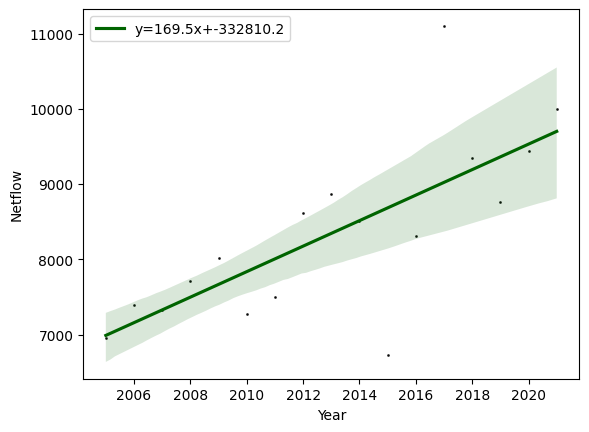

In [271]:
slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(popflow2.Year,
                                                               popflow2.Netflow)

print(slope2, intercept2, r_value2, p_value2, std_err2)
ax2 = sns.regplot( x='Year', y='Netflow', data = popflow2, 
                   scatter = True, ci = 95, fit_reg = True,
                   scatter_kws={"color": "black", 's': 1}, order=1,
                   line_kws={'color': 'darkgreen', 
                             'label': 'y={0:.1f}x+{1:.1f}'.format(slope2, intercept2)} ) 
ax2.legend()

In [8]:
print( popflow.index.values )
print( popflow.values )
print(galveston_popflow_inflow.columns)

[2018 2007 2005 2009 2006 2008 2017 2015 2010 2013 2011 2019 2014 2020
 2021 2012 2016]
[ 9342.  7331.  6955.  8023.  7395.  7709. 11101.  6723.  7278.  8863.
  7496.  8758.  8513.  9441.  9995.  8610.  8314.]
Index(['index', 'y2_statefips', 'y2_countyfips', 'y1_statefips',
       'y1_countyfips', 'y1_state', 'y1_countyname', 'n1', 'n2', 'agi'],
      dtype='object')


In [273]:
root_pth_list = [ 
    "/Users/yuhan/Desktop/Gradient_Boost_code/data/migration_data/Galveston_US_flows/inflow",
    "/Users/yuhan/Desktop/Gradient_Boost_code/data/migration_data/Galveston_US_flows/outflow" ]


root_pth_names = ["HGinflow", "HGoutflow"]

In [302]:
from pandas.api.types import is_object_dtype

for ri in range(len(root_pth_list)):
    root_pthi = root_pth_list[ri]
    rootnamei = root_pth_names[ri]
    csv_files = glob.glob(os.path.join(root_pthi, "*.csv")) 
    df_popflow_HG = []
    # loop over the list of csv files 
    for f in csv_files: 
        # read the csv file 
        year_fi = int( f[-6:-4] )
        population_flow_HG  = pd.read_csv(f, encoding = "ISO-8859-1") 
        if rootnamei == "HGinflow":
            population_flow_HG.columns   = ['y2_statefips', 'y2_countyfips', 'y1_statefips', 
                                            'y1_countyfips', 'y1_state', 'y1_countyname', 
                                            'n1', 'n2', 'agi' ]
            if is_object_dtype( population_flow_HG.n1 ) :
                population_flow_HG['n1']     = population_flow_HG['n1'].replace({',':''},regex=True).replace('d','', regex=True).apply(pd.to_numeric,1)
            if is_object_dtype( population_flow_HG.n2 ) :
                population_flow_HG['n2']     = population_flow_HG['n2'].replace({',':''},regex=True).replace('d','', regex=True).apply(pd.to_numeric,1)
            if is_object_dtype( population_flow_HG.agi ) :
                population_flow_HG['agi']    = population_flow_HG['agi'].replace({',':''},regex=True).replace('d','', regex=True).apply(pd.to_numeric,1)

            population_flow_HG = population_flow_HG.loc[ 
                                 ( population_flow_HG['y2_statefips']  == 48 )&
                                 ( population_flow_HG['y2_countyfips'] == 167 ) &
                                 ( population_flow_HG['y1_statefips'] == 48 ) & 
                                 ( population_flow_HG['y1_countyfips'].isin([201, 39, 157, 339, 291, 71]) )   
                                 ].reset_index()
            population_flow_HG['n1']     = population_flow_HG['n1'].replace({',':''},regex=True).apply(pd.to_numeric,1)
            population_flow_HG['n2']     = population_flow_HG['n2'].replace({',':''},regex=True).apply(pd.to_numeric,1)
            population_flow_HG['agi']    = population_flow_HG['agi'].replace({',':''},regex=True).apply(pd.to_numeric,1)
            flow_HG = population_flow_HG.groupby(['y2_statefips',
                                                  'y2_countyfips', 
                                                  'y1_statefips']).agg({'n1': 'sum', 
                                                                        'n2': 'sum',
                                                                        'agi': 'sum'}).reset_index()
            #df_popflow.append( galveston_flow_df )
        else :
            population_flow_HG.columns   = ['y1_statefips', 'y1_countyfips',  'y2_statefips', 
                                           'y2_countyfips', 'y2_state', 'y2_countyname', 
                                           'n1', 'n2', 'agi' ]
            if is_object_dtype( population_flow_HG.n1 ) :
                population_flow_HG['n1']     = population_flow_HG['n1'].replace({',':''},regex=True).replace('d','', regex=True).apply(pd.to_numeric,1)
            if  is_object_dtype( population_flow_HG.n2 ) :
                population_flow_HG['n2']     = population_flow_HG['n2'].replace({',':''},regex=True).replace('d','', regex=True).apply(pd.to_numeric,1)
            if  is_object_dtype( population_flow_HG.agi ) :
                population_flow_HG['agi']    = population_flow_HG['agi'].replace({',':''},regex=True).replace('d','', regex=True).apply(pd.to_numeric,1)
            population_flow_HG = population_flow_HG.loc[ 
                                ( population_flow_HG['y1_statefips']  == 48 )&
                                ( population_flow_HG['y1_countyfips'] == 167 ) &
                                ( population_flow_HG['y2_statefips'] == 48 ) & 
                                ( population_flow_HG['y2_countyfips'].isin([201, 39, 157, 339, 291, 71]) )    ].reset_index()
            population_flow_HG['n1']     = population_flow_HG['n1'].replace({',':''},regex=True).apply(pd.to_numeric,1)
            population_flow_HG['n2']     = population_flow_HG['n2'].replace({',':''},regex=True).apply(pd.to_numeric,1)
            population_flow_HG['agi']    = population_flow_HG['agi'].replace({',':''},regex=True).apply(pd.to_numeric,1)
            flow_HG = population_flow_HG.groupby(['y1_statefips',
                                                  'y1_countyfips', 
                                                  'y2_statefips']).agg({'n1': 'sum',
                                                                        'n2': 'sum',
                                                                        'agi': 'sum'}).reset_index()

            #print( galveston_flow_df.dtypes )
        flow_HG["Year"]   = year_fi + 2000
        df_popflow_HG.append( flow_HG )

    HouGalv_popflow_rooti = pd.concat( df_popflow_HG )
    print( "Galveston population flow with {} shape {} ".format( rootnamei, HouGalv_popflow_rooti.shape ) ) 
    
    out_pthi = r"/Users/yuhan/Desktop/Gradient_Boost_code/data/migration_data/Galveston_US_flows/{}.csv".format(rootnamei)
    HouGalv_popflow_rooti.to_csv( out_pthi , index=False ) 

            

Galveston population flow with HGinflow shape (17, 7) 
Galveston population flow with HGoutflow shape (17, 7) 


In [303]:
HG_popflow_inflow  = pd.read_csv( r"/Users/yuhan/Desktop/Gradient_Boost_code/data/migration_data/Galveston_US_flows/HGinflow.csv", encoding = "ISO-8859-1" )
HG_popflow_outflow = pd.read_csv( r"/Users/yuhan/Desktop/Gradient_Boost_code/data/migration_data/Galveston_US_flows/HGoutflow.csv", encoding = "ISO-8859-1" )

HG_popflow_inflow  = HG_popflow_inflow.set_index('Year')
HG_popflow_outflow = HG_popflow_outflow.set_index('Year')

print(HG_popflow_inflow.columns)
print(HG_popflow_outflow.columns)

Index(['y2_statefips', 'y2_countyfips', 'y1_statefips', 'n1', 'n2', 'agi'], dtype='object')
Index(['y1_statefips', 'y1_countyfips', 'y2_statefips', 'n1', 'n2', 'agi'], dtype='object')


In [304]:
popflow3 = pd.concat([HG_popflow_inflow.n1, HG_popflow_outflow.n1], axis=1).fillna(0).min(axis=1)

popflow3 = HG_popflow_outflow.n1

popflow4 = pd.DataFrame()
popflow4["Netflow"] = popflow3.values.tolist()
popflow4["Year"] = popflow3.index.values.tolist()
print( popflow4 )
#popflow4 = popflow4.loc[popflow4["Year"] != 2009]
#plt.scatter(popflow2.Year, popflow2.Netflow)
#plt.show()

    Netflow  Year
0    4110.0  2008
1    4818.0  2019
2    3816.0  2015
3    3983.0  2010
4    5841.0  2017
5    4015.0  2011
6    4690.0  2013
7    5319.0  2021
8    4730.0  2012
9    4580.0  2016
10   4648.0  2014
11   5133.0  2020
12   5080.0  2018
13   5368.0  2009
14   3665.0  2005
15   3786.0  2007
16   3831.0  2006


89.68382352941177 -175979.83088235295 0.6893358446719684 0.002204476029674593 24.335551680533655


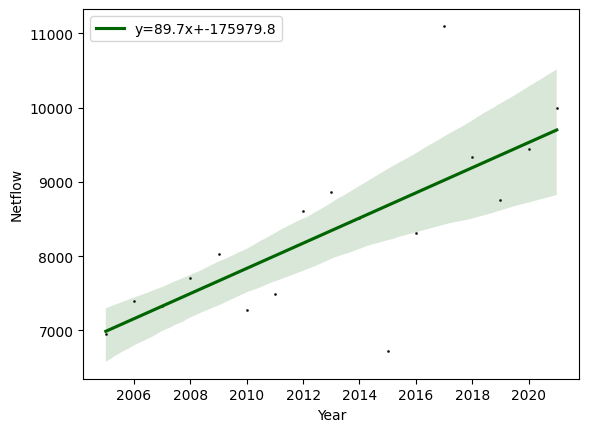

In [305]:
slope, intercept, r_value, p_value, std_err = stats.linregress(popflow4.Year,
                                                               popflow4.Netflow)

print(slope, intercept, r_value, p_value, std_err)
ax2 = sns.regplot( x='Year', y='Netflow', data = popflow2, 
                   scatter = True, ci = 95, fit_reg = True,
                   scatter_kws={"color": "black", 's': 1}, order=1,
                   line_kws={'color': 'darkgreen', 
                             'label': 'y={0:.1f}x+{1:.1f}'.format(slope, intercept)} ) 
ax2.legend()

In [300]:
popflow2['Category'] = "All"
popflow4['Category'] = "Texas"
popflow2.head()
popflow_toal = pd.concat( [popflow2, popflow4] )


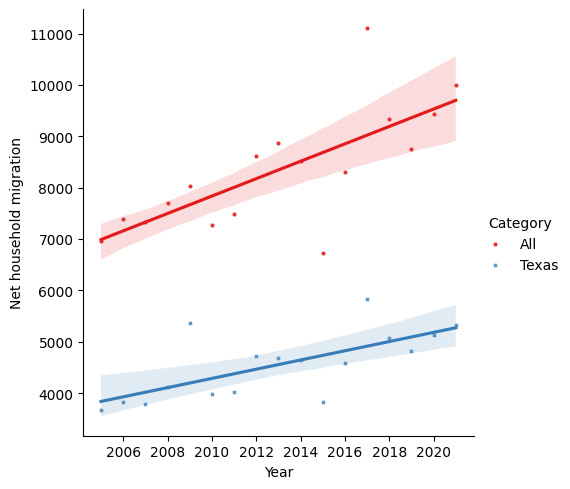

In [306]:
ax = sns.lmplot(x = "Year", y = "Netflow",
           hue = "Category", data = popflow_toal, 
           markers = ["o", "x"], palette = "Set1", scatter_kws = {"s": 4})
ax.set(xlabel='Year', ylabel='Net household migration')
plt.show()

In [307]:
flow_HG = population_flow_HG.groupby(['y1_statefips', 'y1_countyfips', 
                                      'y2_statefips']).agg({'n1': 'sum', 'n2': 'sum', 
                                                            'agi': 'sum'}).reset_index()
flow_HG


,y1_statefips,y1_countyfips,y2_statefips,n1,n2,agi
0,48,167,48,3831.0,7190.0,177186.0


# Aggregate The Flow Data to a DataFrame

In [18]:
galveston_popflow_inflow  = pd.read_csv( r"/Users/yuhan/Desktop/Gradient_Boost_code/data/migration_data/Galveston_US_flows/inflow.csv", encoding = "ISO-8859-1" )
galveston_popflow_outflow = pd.read_csv( r"/Users/yuhan/Desktop/Gradient_Boost_code/data/migration_data/Galveston_US_flows/outflow.csv", encoding = "ISO-8859-1" )

print(galveston_popflow_inflow.columns)
print(galveston_popflow_outflow.columns)

Index(['index', 'y2_statefips', 'y2_countyfips', 'y1_statefips',
       'y1_countyfips', 'y1_state', 'y1_countyname', 'n1', 'n2', 'agi',
       'Year'],
      dtype='object')
Index(['index', 'y1_statefips', 'y1_countyfips', 'y2_statefips',
       'y2_countyfips', 'y2_state', 'y2_countyname', 'n1', 'n2', 'agi',
       'Year'],
      dtype='object')


In [19]:
galveston_popflow_inflow.columns  = [ 'index', 'y2_statefips', 'y2_countyfips', 
                                      'y1_statefips', 'y1_countyfips', 'y1_state', 
                                      'y1_countyname', 'in_HH', 'in_Pop', 'in_agi',
                                      'Year']
galveston_popflow_outflow.columns = [ 'index', 'y1_statefips', 'y1_countyfips', 
                                      'y2_statefips', 'y2_countyfips', 'y2_state', 
                                      'y2_countyname', 'out_HH', 'out_Pop', 'out_agi', 
                                      'Year']

print(galveston_popflow_inflow.shape)
print(galveston_popflow_inflow.shape)

result = pd.merge(galveston_popflow_inflow[['in_HH', 'in_Pop', 'in_agi', 'Year']], 
                  galveston_popflow_outflow[['out_HH', 'out_Pop', 'out_agi', 'Year']], 
                  how="outer", on= "Year" ).reset_index()


out_pthi2 = r"/Users/yuhan/Desktop/Gradient_Boost_code/data/migration_data/Galveston_US_flows/year_total_flows.csv"
result.to_csv( out_pthi2, index = False)

(17, 11)
(17, 11)


In [20]:
HG_popflow_inflow  = pd.read_csv( r"/Users/yuhan/Desktop/Gradient_Boost_code/data/migration_data/Galveston_US_flows/HGinflow.csv", encoding = "ISO-8859-1" )
HG_popflow_outflow = pd.read_csv( r"/Users/yuhan/Desktop/Gradient_Boost_code/data/migration_data/Galveston_US_flows/HGoutflow.csv", encoding = "ISO-8859-1" )

#HG_popflow_inflow  = HG_popflow_inflow.set_index('Year')
#HG_popflow_outflow = HG_popflow_outflow.set_index('Year')
print(HG_popflow_inflow.columns)
print(HG_popflow_outflow.columns)



Index(['y2_statefips', 'y2_countyfips', 'y1_statefips', 'n1', 'n2', 'agi',
       'Year'],
      dtype='object')
Index(['y1_statefips', 'y1_countyfips', 'y2_statefips', 'n1', 'n2', 'agi',
       'Year'],
      dtype='object')


In [21]:
HG_popflow_inflow.columns  = ['y2_statefips', 'y2_countyfips', 'y1_statefips', 
                              'in_HH', 'in_Pop', 'in_agi', 'Year']
HG_popflow_outflow.columns = ['y1_statefips', 'y1_countyfips', 'y2_statefips', 
                              'out_HH', 'out_Pop', 'out_agi', 'Year']

print(HG_popflow_inflow.shape)
print(HG_popflow_outflow.shape)

(17, 7)
(17, 7)


In [23]:
result2 = pd.merge(HG_popflow_inflow[['in_HH', 'in_Pop', 'in_agi', 'Year']], 
                  HG_popflow_outflow[['out_HH', 'out_Pop', 'out_agi', 'Year']], 
                  how="outer", on= "Year" ).reset_index()


In [24]:
print( result2.head() )

   index   in_HH   in_Pop    in_agi  Year  out_HH  out_Pop   out_agi
0      0  5779.0  11399.0  407784.0  2018  5080.0   9534.0  315256.0
1      1  4159.0   8265.0  221166.0  2007  3786.0   7094.0  176987.0
2      2  4390.0   8929.0  215066.0  2005  3665.0   6877.0  152860.0
3      3  4096.0   7912.0  225592.0  2009  5368.0   9988.0  237756.0
4      4  4293.0   8420.0  217839.0  2006  3831.0   7190.0  177186.0


In [25]:
out_pthi2 = r"/Users/yuhan/Desktop/Gradient_Boost_code/data/migration_data/Galveston_US_flows/year_HG_flows.csv"
result2.to_csv( out_pthi2, index = False)


In [26]:
result['Category'] = "All"
result2['Category'] = "Texas"
popflow_toal = pd.concat( [result, result2] )



popflow_toal2 = pd.merge( result, 
                             result2, 
                  how="left", on= "Year" ).reset_index()

popflow_toal2 = popflow_toal2.fillna(0)


In [28]:
print( popflow_toal.head() )

   index    in_HH   in_Pop    in_agi  Year  out_HH  out_Pop   out_agi Category
0      0  10160.0  19826.0  722019.0  2018  9342.0  17850.0  601414.0      All
1      1   8116.0  16125.0  419695.0  2007  7331.0  14100.0  351788.0      All
2      2   8000.0  15906.0  375485.0  2005  6955.0  13329.0  299830.0      All
3      3   8023.0  15801.0  420156.0  2009  9853.0  18603.0  453037.0      All
4      4   8296.0  16461.0  395445.0  2006  7395.0  14179.0  345294.0      All


In [29]:
out_pthi3 = r"/Users/yuhan/Desktop/Gradient_Boost_code/data/migration_data/Galveston_US_flows/year_flows.csv"
popflow_toal.to_csv( out_pthi3, index = False)


# FEMA damage data processing

In [38]:
#FimaNfipClaims  = pd.read_csv( r"/Users/yuhan/Library/CloudStorage/OneDrive-UniversityofTwente/paper——revision/FLCounty_JEPR/FEMA_dataset/FimaNfipClaims.csv", encoding = "ISO-8859-1" )
#print(FimaNfipClaims.shape)
#FimaNfipClaims2 = FimaNfipClaims.loc[ FimaNfipClaims['state'] == 'TX'].reset_index()
#print(FimaNfipClaims2.shape)

In [39]:
#out_pthx = r"/Users/yuhan/Desktop/Gradient_Boost_code/data/FEMANfipClaims_TX.csv"
#FimaNfipClaims2.to_csv( out_pthx, index = False)

In [181]:
claim_pth = r"/Users/yuhan/Desktop/Gradient_Boost_code/data/FEMANfipClaims_TX.csv"
FimaNfipClaims2 = pd.read_csv( claim_pth )
FimaNfipClaims2.head()

/var/folders/t6/8gnslc_j433220_1kgd9hv_c0000gn/T/ipykernel_18390/1867163543.py:2: DtypeWarning: Columns (32) have mixed types. Specify dtype option on import or set low_memory=False.
  FimaNfipClaims2 = pd.read_csv( claim_pth )


,index,agricultureStructureIndicator,asOfDate,baseFloodElevation,basementEnclosureCrawlspace,reportedCity,condominiumIndicator,policyCount,countyCode,communityRatingSystemDiscount,...,postFIRMConstructionIndicator,rateMethod,smallBusinessIndicatorBuilding,state,totalBuildingInsuranceCoverage,totalContentsInsuranceCoverage,yearOfLoss,reportedZipcode,primaryResidence,id
0,11,0.0,2021-07-25T01:39:04.381Z,NaN,NaN,Temporarily Unavailable,N,1.0,48201.0,5.0,...,1.0,7,0.0,TX,250000.0,100000.0,2017,77077.0,1.0,613f47f2f2b55a0837dff2bc
1,22,0.0,2021-07-25T01:39:04.381Z,NaN,NaN,Temporarily Unavailable,N,1.0,48293.0,NaN,...,0.0,1,0.0,TX,70300.0,0.0,2010,76642.0,1.0,613f47f2f2b55a0837dff2c7
2,24,0.0,2021-07-25T01:39:04.381Z,52.0,NaN,Temporarily Unavailable,N,1.0,48201.0,7.0,...,1.0,1,0.0,TX,250000.0,52500.0,2017,77401.0,1.0,613f47f2f2b55a0837dff2c9
3,27,0.0,2021-07-25T01:39:04.381Z,49.0,NaN,Temporarily Unavailable,N,1.0,48201.0,5.0,...,0.0,1,0.0,TX,209000.0,100000.0,2017,77025.0,0.0,613f47f2f2b55a0837dff2cc
4,28,0.0,2021-07-25T01:39:04.381Z,NaN,NaN,Temporarily Unavailable,N,1.0,48201.0,7.0,...,1.0,7,0.0,TX,150000.0,60000.0,2006,77015.0,1.0,613f47f2f2b55a0837dff2cd


In [182]:
FimaNfipClaims2['month'] = pd.DatetimeIndex(FimaNfipClaims2['dateOfLoss']).month
# claimData = claimData0.loc[ claimData0["state"] == "FL"]
claimData = FimaNfipClaims2.loc[(FimaNfipClaims2['yearOfLoss'] > 2000) &
                          (FimaNfipClaims2['yearOfLoss'] <= 2020),]
print(claimData.shape)
claimData = claimData.dropna(subset=['countyCode'])

claimData['floodZone'] = claimData['floodZone'].astype( str )
claimData['countyCode'] = claimData['countyCode'].astype( "int64" )


(267162, 42)


In [183]:
print(claimData.shape) 
claimData = claimData.loc[ (claimData['agricultureStructureIndicator'] != 1) &
                           (claimData['countyCode'] == 48167),]
print(claimData.shape)

(266795, 42)
(36861, 42)


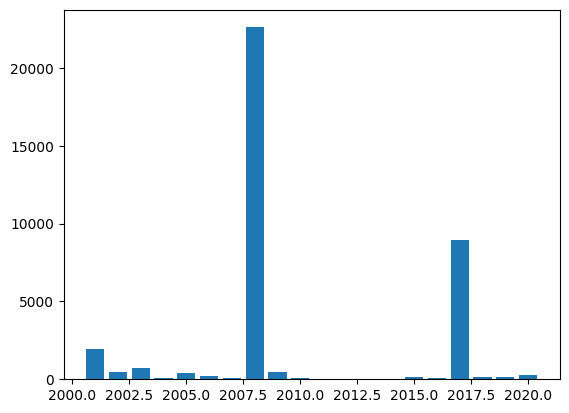

In [184]:
YearOfLoss = claimData.groupby(['yearOfLoss']).agg({'yearOfLoss': 'count'})
plt.bar(YearOfLoss.index.tolist(), YearOfLoss.yearOfLoss.tolist())
plt.show()


In [185]:
grouped_claim = claimData.groupby([ 'yearOfLoss' ]).agg({
    'amountPaidOnBuildingClaim': ['sum'],
    'policyCount': ['count'],
    'amountPaidOnContentsClaim': ['sum']
}).reset_index()

#
grouped_claim.columns = [ 'Year',
                            'ClaimBuilPaid', 'Claimpolicycount',
                            'ContentPaid']
print( grouped_claim.head() )


   Year  ClaimBuilPaid  Claimpolicycount  ContentPaid
0  2001    29926649.63              1916  13872408.64
1  2002     2325555.26               467    594542.99
2  2003     3746305.23               715   1059149.54
3  2004      192953.21                57     99729.31
4  2005     1535252.84               376    386215.59


In [186]:
grouped_claim2 = grouped_claim.loc[grouped_claim['Year'] >= 2005]
claim_galv_pth = r"/Users/yuhan/Desktop/Gradient_Boost_code/data/Year_Claims_Galveston.csv"
grouped_claim2.to_csv( claim_galv_pth, index = False)

In [187]:
HMA_pthi3 = r"/Users/yuhan/Desktop/Gradient_Boost_code/data/Mitigated_properties_Galveston.csv"
HMA_toal = pd.read_csv( HMA_pthi3 )

print( HMA_toal.head() )
print( HMA_toal.propertyAction.unique())
print( HMA_toal.shape )
HMA_toal2 = HMA_toal.loc[ HMA_toal['propertyAction'] .isin(["Acquisition/Demolition", 
                                           "Acquisition of Vacant Land", "Acquisition/Relocation"]) ]
print( HMA_toal2.programFy.unique() )

  projectIdentifier programArea  programFy  disasterNumber  \
0    DR-1791-0012-R        HMGP       2008            1791   
1    DR-1379-0016-R        HMGP       2001            1379   
2    DR-1439-0005-R        HMGP       2003            1439   
3    DR-1379-0004-R        HMGP       2001            1379   
4    DR-1439-0005-R        HMGP       2003            1439   

           propertyAction  structureType  \
0  Acquisition/Demolition  Single Family   
1  Acquisition/Demolition  Single Family   
2  Acquisition/Demolition  Single Family   
3                     NaN  Single Family   
4  Acquisition/Demolition  Single Family   

                        typeOfResidency foundationType     county       city  \
0  Owner Occupied - Principal Residence  Slab on Grade  Galveston  GALEVSTON   
1  Owner Occupied - Principal Residence  Slab on Grade     Harris    HOUSTON   
2  Owner Occupied - Principal Residence  Slab on Grade     Harris    HOUSTON   
3                                   NaN  S

   Year  AmountPaid  NumberProperty
0  1998     4813833             152
1  1999     8899680             145
2  2000      492945               7
3  2001    83925020            1064
4  2002    10285217             162


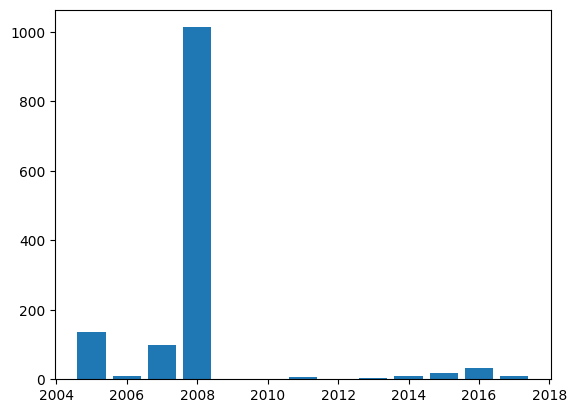

In [192]:
grouped_HMA_toal = HMA_toal2.groupby([ 'programFy' ]).agg({
    'actualAmountPaid': ['sum'],
    'numberOfProperties': ['count']
}).reset_index()

#
grouped_HMA_toal.columns = [ 'Year',
                            'AmountPaid', 'NumberProperty']
print( grouped_HMA_toal.head() )
grouped_HMA_toal = grouped_HMA_toal.loc[grouped_HMA_toal['Year'] >= 2005]


plt.bar(grouped_HMA_toal.Year.tolist(), grouped_HMA_toal.NumberProperty.tolist())
plt.show()

In [193]:
print( grouped_claim2.columns )
print( grouped_HMA_toal.columns)

grouped_claim2.columns = ['Year', 'ClaimBuilPaid', 'CountN', 'ContentPaid']
grouped_HMA_toal.columns = ['Year', 'AmountPaid', 'CountN']

Index(['Year', 'ClaimBuilPaid', 'CountN', 'ContentPaid'], dtype='object')
Index(['Year', 'AmountPaid', 'NumberProperty'], dtype='object')


In [194]:

result_cliam_HMA = pd.merge( grouped_claim2, 
                             grouped_HMA_toal, 
                  how="inner", on= "Year" ).reset_index()

result_cliam_HMA = result_cliam_HMA.fillna(0)
result_cliam_HMA.shape


(10, 7)

In [191]:
out_pthix = r"/Users/yuhan/Desktop/Gradient_Boost_code/data/migration_data/Galveston_US_flows/year_total_flows.csv"
result_total = pd.read_csv( out_pthix )
result_total.head()

result_cliam_HMA_total = pd.merge( result_cliam_HMA, 
                             result_total, 
                  how="left", on= "Year" ).reset_index()

result_cliam_HMA_total = result_cliam_HMA_total.fillna(0)


x_pth = r"/Users/yuhan/Desktop/Gradient_Boost_code/data/Year_Claims_HMA_inflow_Galv.csv"
result_cliam_HMA_total.to_csv( x_pth, index = False)


In [175]:
grouped_claim2['Category']    = "Claim"
grouped_HMA_toal['Category'] = "HMA"
claim_HMA_toal = pd.concat( [grouped_claim2[ ["Year", "CountN" , "Category"] ], 
                           grouped_HMA_toal[ ["Year", "CountN" , "Category"] ]] )

/var/folders/t6/8gnslc_j433220_1kgd9hv_c0000gn/T/ipykernel_18390/3722613870.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_claim2['Category']    = "Claim"


In [133]:
#claim_HMA_toal.head()

,Year,CountN,Category
0,2001,1916,Claim
1,2002,467,Claim
2,2003,715,Claim
3,2004,57,Claim
4,2005,376,Claim


In [176]:
#result_popflow_cliam.head()
cliam_HMA_pth = r"/Users/yuhan/Desktop/Gradient_Boost_code/data/Year_Claims_HMA_Galv.csv"
claim_HMA_toal.to_csv( cliam_HMA_pth, index = False)


In [1]:
for i,(thisdate,title) in enumerate(zip(["2020-04-01","2021-04-01","2021-10-01"], 
                                        ["April 2020","April 2021","October 2021"])):
    print(thisdate, "xx", title)

2020-04-01 xx April 2020
2021-04-01 xx April 2021
2021-10-01 xx October 2021
